In [1]:
import torch
import torch.nn.functional as F
import os
import json
import numpy as np
import torchvision
import models_vit
import sys
import matplotlib.pyplot as plt

from PIL import Image
from matplotlib.colors import LinearSegmentedColormap
from torchvision import models
from torchvision import transforms
from captum.attr import IntegratedGradients
from captum.attr import GradientShap
from captum.attr import Saliency
from captum.attr import NoiseTunnel
from captum.attr import visualization as viz

torch.manual_seed(0)
np.random.seed(0)

In [2]:
Image_path = '/home/john/network/CLIP/152740-01-L-20161021.jpg'

In [3]:
model = models_vit.__dict__['vit_large_patch16'](num_classes=2, drop_path_rate=0.2,global_pool=True,)

checkpoint = torch.load('Gender_model_V2_checkpoint_epoch_20.pth', map_location='cpu')
checkpoint_model = checkpoint
state_dict = model.state_dict()

msg = model.load_state_dict(checkpoint_model, strict=False)

model.eval()

transform = transforms.Compose([ transforms.Resize([224,224]),transforms.ToTensor()])
transform_normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])

img = Image.open(Image_path)

transformed_img = transform(img)

input = transform_normalize(transformed_img)
input = input.unsqueeze(0)

output = model(input)
output = F.softmax(output, dim=1)
prediction_score, pred_label_idx = torch.topk(output, 1)

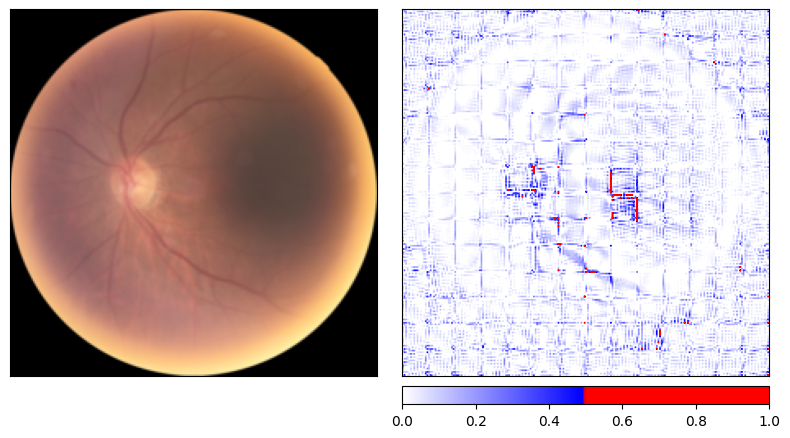

In [4]:
# Create IntegratedGradients object and get attributes
integrated_gradients = IntegratedGradients(model)
attributions_ig = integrated_gradients.attribute(input, target=pred_label_idx, n_steps=100)

# create custom colormap for visualizing the result
default_cmap = LinearSegmentedColormap.from_list('custom blue', 
                                                 [(0, '#ffffff'),
                                                 (0.49, '#0000FF'),
                                                  (0.5, '#FF0000'),
                                                  (1, '#FF0000')], N=256)

# visualize the results using the visualize_image_attr helper method
_ = viz.visualize_image_attr_multiple(np.transpose(attributions_ig.squeeze().cpu().detach().numpy(), (1,2,0)),
                             np.transpose(transformed_img.squeeze().cpu().detach().numpy(), (1,2,0)),
                             methods=["original_image", "heat_map"],
                             signs=['all', 'positive'],
                             cmap=default_cmap,
                             show_colorbar=True)

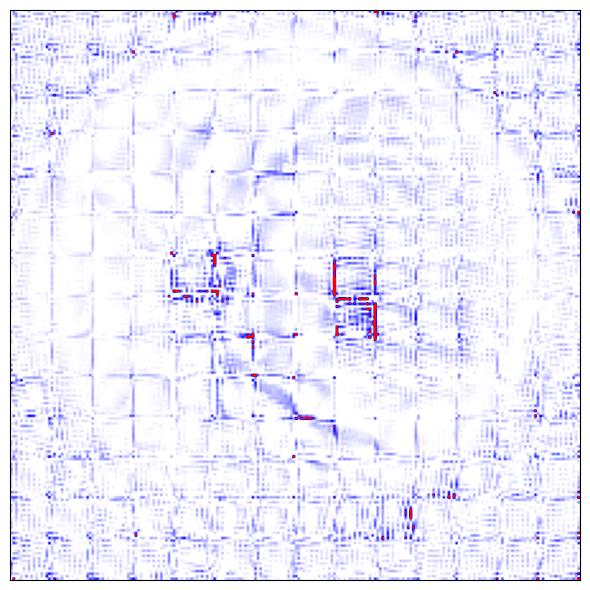

In [10]:
# Create IntegratedGradients object and get attributes
integrated_gradients = IntegratedGradients(model)
attributions_ig = integrated_gradients.attribute(input, target=pred_label_idx, n_steps=100)

# create custom colormap for visualizing the result
default_cmap = LinearSegmentedColormap.from_list('custom blue', 
                                                 [(0, '#ffffff'),
                                                 (0.49, '#0000FF'),
                                                  (0.5, '#FF0000'),
                                                  (1, '#FF0000')], N=256)

# visualize the results using the visualize_image_attr helper method
_ = viz.visualize_image_attr_multiple(np.transpose(attributions_ig.squeeze().cpu().detach().numpy(), (1,2,0)),
                             np.transpose(transformed_img.squeeze().cpu().detach().numpy(), (1,2,0)),
                             methods=["heat_map"],
                             signs=['positive'],
                             cmap=default_cmap,
                             show_colorbar=False)

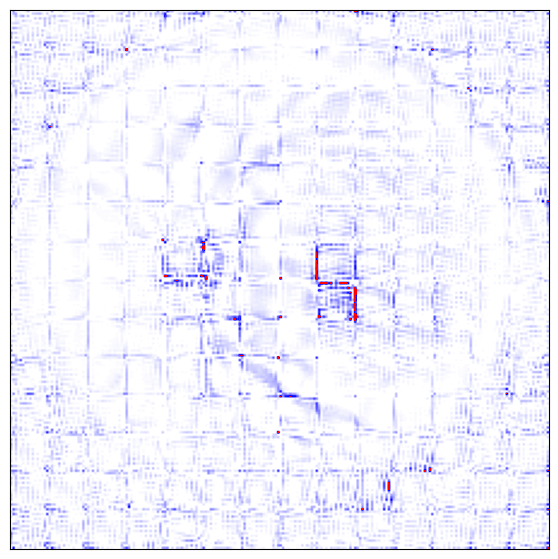

In [19]:
# Create IntegratedGradients object and get attributes
integrated_gradients = IntegratedGradients(model)
attributions_ig = integrated_gradients.attribute(input, target=pred_label_idx, n_steps=100)

# create custom colormap for visualizing the result
default_cmap = LinearSegmentedColormap.from_list('custom blue', 
                                                 [(0, '#ffffff'),
                                                 (0.49, '#0000FF'),
                                                  (0.5, '#FF0000'),
                                                  (1, '#FF0000')], N=256)

# visualize the results using the visualize_image_attr helper method
_ = viz.visualize_image_attr(np.transpose(attributions_ig.squeeze().cpu().detach().numpy(), (1,2,0)),
                             np.transpose(transformed_img.squeeze().cpu().detach().numpy(), (1,2,0)),
                             method='heat_map',
                             sign= 'positive',
                             cmap=default_cmap,
                             show_colorbar=False,
                             outlier_perc=1,
                             fig_size=(7,7),
                             use_pyplot=True)